<a href="https://colab.research.google.com/github/Braafisch/Datenfusion-Aufgaben/blob/main/Laboraufgabe/Laboraufgabe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
import requests
import shutil
from numpy.random import default_rng

In [3]:
url = 'https://raw.githubusercontent.com/Braafisch/Datenfusion-Aufgaben/main/Laboraufgabe/Leoni.dat'
data_path = '/content/Leoni.dat'
response = requests.get(url, allow_redirects = True)
with open(data_path, 'wb') as data_fileobj:
  data_fileobj.write(response.content)

data = np.genfromtxt(data_path, names=None, dtype=None, delimiter=';')
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  import sys


array([[b'Eintrag', b'Datum', b'Schlusskurs'],
       [b'1', b'01.06.2006', b'29.87'],
       [b'2', b'02.06.2006', b'30.36'],
       ...,
       [b'2998', b'09.02.2018', b'54.94'],
       [b'2999', b'12.02.2018', b'54.62'],
       [b'3000', b'13.02.2018', b'54.06']], dtype='|S11')

In [4]:
y = np.asarray(data[1:,2],dtype=float)#float(data[1:,2])
t = np.asarray(data[1:,0],dtype=float)
Ts = t[1] - t[0]
R = 1
#Q = 
d = data[1:,1]
u = np.zeros((y.size,1))

In [5]:
Ad = np.array([[1,Ts],[0,1]])
Bs = np.array([0,0])
C = np.array([1,0])
D = 0
Gd = np.array([Ts,1])

In [8]:
x_dach = np.array([y[0],0])
P_dach = 50*np.array([[1,0],[0,1]])

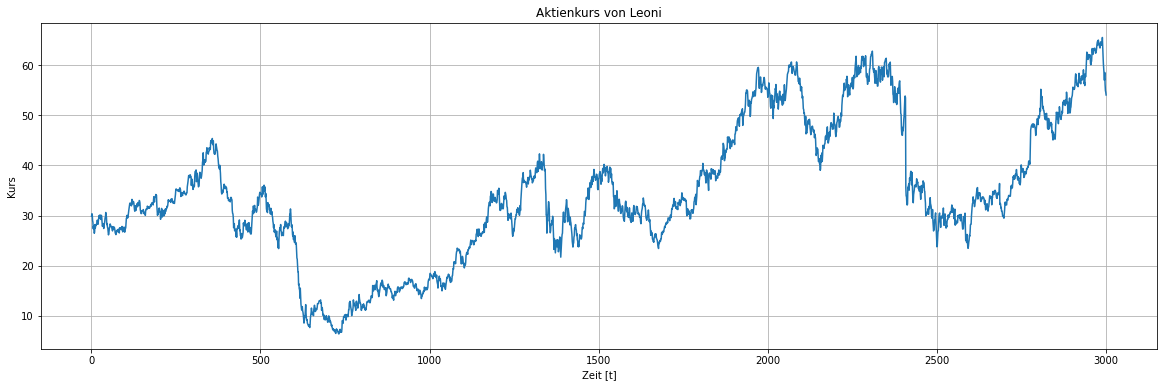

In [7]:
plt.figure(figsize=(20,6))
plt.title("Aktienkurs von Leoni")
plt.xlabel("Zeit [t]")
plt.ylabel("Kurs")
plt.grid(True)
plt.plot(t, y)
plt.show() 

In [ ]:
### Kalman ###
for itr in range(0, len(y)-1):
  y_dach.append(C@x_dach + D*u[itr])
  d_y.append(y[itr] - y_dach[-1])
  K = (P_dach@C.reshape(-1,1)*(C@P_dach@C.reshape(-1,1) + R)**(-1)) #␣
  x_tilde = x_dach + K*d_y[-1]
  P_tilde = (np.identity(n=2) - K*C)@P_dach
  x_dach = Ad@x_tilde + Bd*u[itr]
  P_dach = Ad@P_tilde@Ad.T + G@Q*G.T
  s.append(x_tilde[0])
  v.append(x_tilde[1])
  s_dach.append(x_dach[0])

In [13]:
for x in np.arange(10):
  print(x)

0
1
2
3
4
5
6
7
8
9
